In [1]:
!git clone https://github.com/sourjyadip/genre_classification

Cloning into 'genre_classification'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 36 (delta 15), reused 26 (delta 5), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [2]:
import cv2
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!sudo pip3 install python-dotenv

['arr_0', 'arr_1']
(6394, 640, 128) (6394, 8)
['arr_0', 'arr_1']
(800, 640, 128) (800, 8)
Dataset split
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 640, 128, 169)     1690      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 320, 64, 169)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 320, 64, 169)      676       
_________________________________________________________________
dropout (Dropout)            (None, 320, 64, 169)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 64, 339)      515958    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 107, 22, 339)      0         
__________________

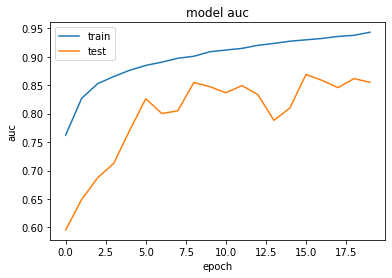

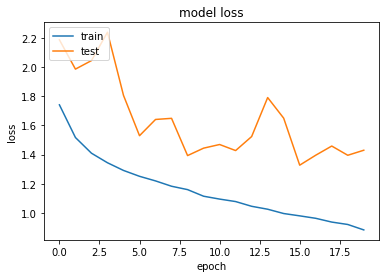

In [1]:
#Architecture taken from https://arxiv.org/abs/1609.04243  
import json
import numpy as np 
from sklearn .model_selection import train_test_split
import tensorflow.keras as keras
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import tensorflow as tf 

import sys
sys.path.append('/content/genre_classification')
import utils


#DATA_PATH = 

def load_data(data_path):
    #loads training data from json file
    #params: data path 
    #returns: x (nd array) : Input
    #y (nd array) : Targets
    with open(data_path, "r") as fp:
        data = json.load(fp)
    x = np.array(data['mfcc'])
    y = np.array(array['labels'])
    return x,y

def prepare_datasets():
    # Directory where mp3 are stored.
    #AUDIO_DIR = 'data/fma_small/'

    # Load metadata and features.
    #tracks = utils.load('/content/drive/MyDrive/genre_data/fma_metadata/tracks.csv')
    #genres = utils.load('/content/drive/MyDrive/genre_data/fma_metadata/genres.csv')
    #features = utils.load('/content/drive/MyDrive/genre_data/fma_metadata/features.csv')
    #load data
    #x,y = load_data(DATA_PATH)
    #create train test split
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
    #create train validation split
    #x_train, x_validation, y_train, y_validationv = train_test_split(x_train, y_train, test_size = validation_size)
    #3d array for each sample
    #(130,140,1)
    #small = tracks['set', 'subset'] <= 'small'
    #getting mfcc directly for training
    #train = tracks['set', 'split'] == 'training'
    #val = tracks['set', 'split'] == 'validation'
    #test = tracks['set', 'split'] == 'test'

    #y_train = tracks.loc[small & train, ('track', 'genre_top')]
    #y_test = tracks.loc[small & test, ('track', 'genre_top')]
    #y_validation = tracks.loc[small & val, ('track', 'genre_top')]
    #x_train = features.loc[small & train, 'mfcc']
    #x_test = features.loc[small & test, 'mfcc']
    #x_validation = features.loc[small & val, 'mfcc']

    #y_train.to_numpy()
    #y_test.to_numpy()
    #y_validation.to_numpy()
    #x_train.to_numpy()
    #x_test.to_numpy()
    #x_validation.to_numpy()
    npzfile = np.load('/content/drive/MyDrive/data/shuffled_train.npz') #change path
    print(npzfile.files)
    x_train = npzfile['arr_0']
    y_train = npzfile['arr_1']
    print(x_train.shape, y_train.shape)
    
    npzfile = np.load('/content/drive/MyDrive/data/shuffled_valid.npz') #change path
    print(npzfile.files)
    x_validation = npzfile['arr_0']
    y_validation = npzfile['arr_1']
    print(x_validation.shape, y_validation.shape)
    '''
    npzfile = np.load('/content/drive/MyDrive/data/test_arr.npz') #change path
    print(npzfile.files)
    x_test= npzfile['arr_0']
    y_test = npzfile['arr_1']
    print(x_test.shape, y_test.shape)
    '''
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.125)


    x_train = x_train[... , np.newaxis]
    x_validation = x_validation[... , np.newaxis]
    x_test = x_test[... , np.newaxis]
    return x_train, x_validation, x_test, y_train, y_validation, y_test 
def build_model(input_shape):
    #create model
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(169, (3,3),  activation = 'relu', input_shape = input_shape, padding ='same'))
    model.add(keras.layers.MaxPool2D((2,2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    
    model.add(keras.layers.Conv2D(339, (3,3), activation = 'relu', input_shape = input_shape, padding ='same'))
    model.add(keras.layers.MaxPool2D((3,3), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    
    model.add(keras.layers.Conv2D(339, (3,3), activation = 'relu', input_shape = input_shape, padding ='same'))
    model.add(keras.layers.MaxPool2D((4,4), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))

    model.add(keras.layers.Conv2D(339, (3,3), activation = 'relu', input_shape = input_shape, padding ='same'))
    model.add(keras.layers.MaxPool2D((4,4), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))

    model.add(keras.layers.Reshape(target_shape=(7,678)))
    #model.add(keras.layers.Dense(113, activation = 'relu'))
    #model.add(keras.layers.Flatten())

    #model = keras.Sequential()
    #model.add(keras.layers.TimeDistributed(cnn))
    model.add(keras.layers.LSTM(169, return_sequences = True))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.LSTM(169))
    model.add(keras.layers.Dropout(0.4))

    #model.add(keras.layers.Dense(169, activation = 'relu'))
    #model.add(keras.layers.Dropout(0.4))
    
    model.add(keras.layers.Dense(8, activation = 'softmax')) #8 genres
    #cnn.build(input_shape)
    print(model.summary())
    return model

def predict(model, x, y):
    x = x[np.newaxis, ...]
    prediction = model.predict(x)
    predicted_index = np.argmax(prediction, axis = 1)
    print("Expected index : {}, Predicted index : {}".format(y, predicted_index))

def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title('model auc')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

#Create train, valiadtion and test sets
x_train, x_validation, x_test, y_train, y_validation, y_test = prepare_datasets() #test size, validation size
print("Dataset split")
#build CNN net
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
model = build_model(input_shape)
print("Model built")
#compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = [tf.keras.metrics.AUC()])
print("Network compiled")
#train the network
#print(x_train.shape)
#y_validation = tf.one_hot(y_validation, 8)
history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), batch_size = 32, shuffle=True, epochs = 20)
#print("Network trained")
#evaluate the CNN on test set
#y_test = tf.one_hot(y_test, 8)
test_error, test_auc = model.evaluate(x_test, y_test, verbose = 1)
print("AUC on test set : {}".format(test_auc))
show_summary_stats(history)
#print("Evaluated")